## Import libraries

In [1]:
import pandas as pd # data science library o manipulate data
import matplotlib.pyplot as plt # visualization library
import pickle

## Cleaning Data and Preparation

In [2]:
countries_renewable = pd.read_csv('renewable-share-energy.csv')

austria_renewable = countries_renewable.loc[(countries_renewable['Entity'] == 'Austria') 
                                            & (countries_renewable['Year']>1989)] #select Austria data from 1990-2021
austria_renewable = austria_renewable.rename(columns={'Year': 'date',
                    'Renewables (% equivalent primary energy)': 'Austria Renewables (% equivalent primary energy)'})
austria_renewable['date'] = pd.to_datetime(austria_renewable['date'], format='%Y').dt.year
austria_renewable = austria_renewable[['date', 'Austria Renewables (% equivalent primary energy)']]
austria_renewable = austria_renewable.set_index('date')

In [3]:
data = pd.read_csv('data_clean_china.csv')
data = data.set_index('date')
data = data.drop(columns=['Inflation (%)','GDP Growth (%)']) #drop non features
data = data.rename(columns={'Renewables (% equivalent primary energy)': 'Austria Renewables (% equivalent primary energy)'})
data = data.iloc[:, [0,1,2,3,4,5]] # Change the position of the columns so that Y=column 0 and X all the remaining
data['Austria Renewables (% equivalent primary energy)'] = austria_renewable['Austria Renewables (% equivalent primary energy)']

In [4]:
data.to_csv('china_austria_data.csv', index=True)

## Regression Model

In [5]:
#Load LR model
with open('LR_model.pkl','rb') as file:
    LR_model=pickle.load(file)

In [6]:
data = data.loc[2019:2021]
data

,Kilotons of Co2,Population,GDP (Billions of $US),GDP Per Capita (US $),kWh per Capita,Austria Renewables (% equivalent primary energy)
date,,,,,,
2019,1.070722e+07,1421864031,16624.523980,10143.8382,5161,35.611378
2020,1.020722e+07,1424929781,17176.865661,10408.6698,5331,38.260670
2021,1.070797e+07,1425893465,19429.069638,12556.3331,5500,37.481792


In [7]:
Z = data.values
X = Z[:,[1,2,3,4,5]] #features selected

In [8]:
y_test = Z[:, 0]
y_pred_LR = LR_model.predict(X)

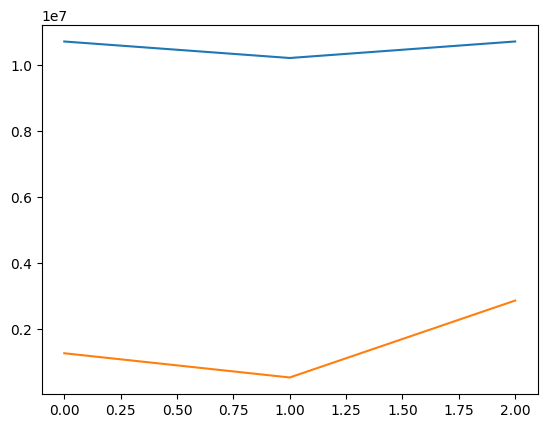

In [9]:
plt.plot(y_test)
plt.plot(y_pred_LR)
plt.show()